## Analysis of Data on the CoVid-19 situation in Italy

I have forked the repository where Protezione Civile stores the daily data on the evolution of the CoVid-19 situation, and attempt my take at data visualization and analysis. I am still a learner in Python (and Markdown), and I am spending some time in my quarantine to learn more programming and statistics. Also, git!

This dataset should be praised as it is extremely transparent, very easy to navigate, and updated daily with amazing punctuality.

Please stay safe and healthy during this time, wherever in the world you are based. 

All the below analysis has been made by myself, Francesco Reina, and are intended for academic study only, and my personal analysis (see below) should not be regarded as an official source of information. I am doing this study in good faith, without any intention to push agendas, point of view or personal views. Just trying to tell the story that the data is telling me.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import scipy as sp

#initialize reader
content = []

#Imports the csv file from Protezione civile

with open('./dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv') as datafile:
    rawcontents = csv.reader(datafile, delimiter=',')
    for row in rawcontents:
        content.append(row)
        
keys = content[0];
content_dict={}

#Data is passed into a dictionary for easy recovery
for i in range(0,len(keys)):
    content_dict[keys[i]] = [];

for i in range(0,len(keys)):
    for j in range(1,len(content)):
        if 2<i<13:
            #numerical data is passed as numbers
            content_dict[keys[i]].append(int(content[j][i]))
        elif i == 0:
            #dates get separated from the 'T18:00:00' string
            content_dict[keys[i]].append(content[j][i][5:10])  
        else:
            #The rest is passed as it is
            content_dict[keys[i]].append(content[j][i])


In [2]:
print(keys)

['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'note_it', 'note_en']


## Official Graphs

### Here we report the visualization that you can also get from the [official website](http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR1wKg5qfeBV66Ar1I6wa86rO3PrjbzUnwV2XbymivBDydWnNmoQmRcKfYk#/dae18c330e8e4093bb090ab0aa2b4892).  In addition to this visualizations, I have also added vertical lines showing at which point the restriction measures were implemented.

## On the restriction measures  
To avoid confusion in the graphs, I have only added, at the moment, two restriction measures.

**09/03**: While on the 08/03 it was announced that only [these](https://upload.wikimedia.org/wikipedia/commons/a/ab/Province_sotto_quarantena_COVID19.png) Northern Italian provinces would be in lockdown, it was extended the day after to the rest of Italy. On the 11/03, it was announced that essential businesses were allowed to run.  
These are all put together as the "Initial Lockdown"

**21/03**: All non-necessary business and industries shut down.

## On the logarithmic scale representation

The above graphs can perhaps be better visualized in y logarithmic scale.  
Why is it that? We assume that all the models that the pandemic can follow are related to the exponential function. A linear growth in a semilogy graph means an exponential growth in linear scale. A flat curve means that they are not increasing.

### We start with the Main Graph, reporting Total Positives, Deceased and Healed populations. Reported in linear and log scale on the y axis.

_The one in log scale starts at 200 as it is the first value for the Total Positives curve_


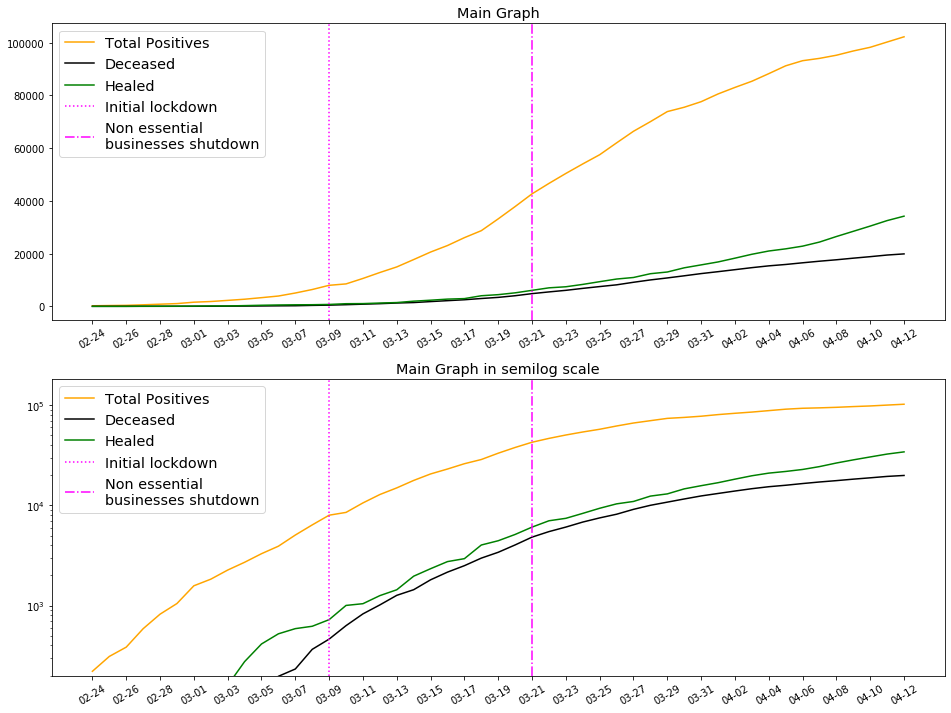

In [3]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Main Graph',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['totale_positivi'], label = 'Total Positives', color = 'orange')
plt.plot(content_dict['data'],content_dict['deceduti'], label = 'Deceased', color = 'black')
plt.plot(content_dict['data'],content_dict['dimessi_guariti'], label = 'Healed', color = 'green')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.subplot(212)
plt.title('Main Graph in semilog scale',fontsize = 'x-large')
plt.semilogy(content_dict['data'],content_dict['totale_positivi'], label = 'Total Positives', color = 'orange')
plt.semilogy(content_dict['data'],content_dict['deceduti'], label = 'Deceased', color = 'black')
plt.semilogy(content_dict['data'],content_dict['dimessi_guariti'], label = 'Healed', color = 'green')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.ylim(bottom = 200)
plt.show()

### Just the deceased, in linear and log scale

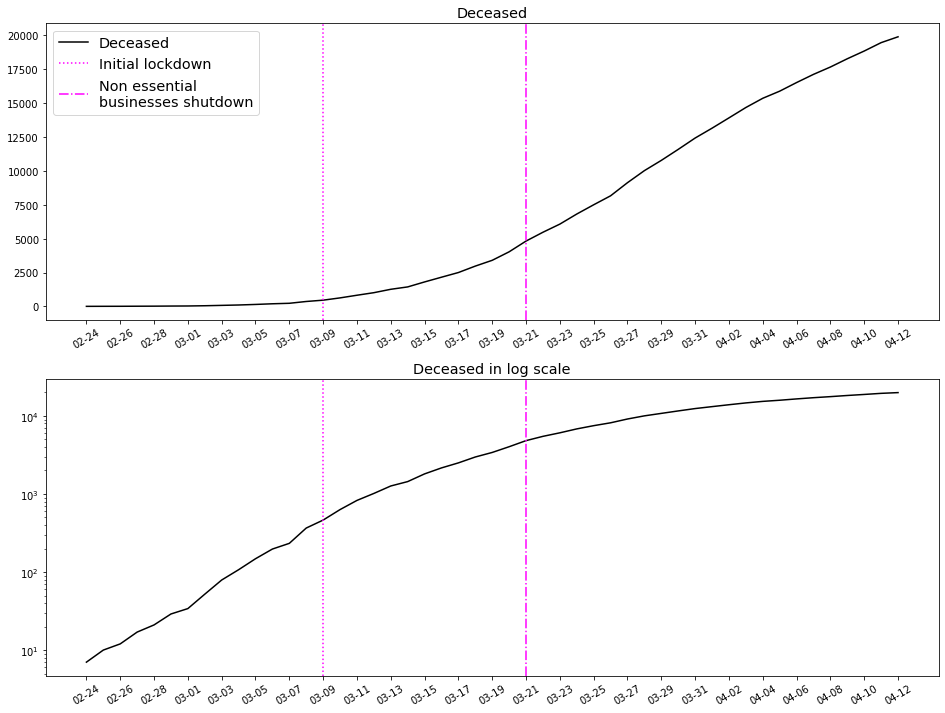

In [4]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Deceased',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['deceduti'], label = 'Deceased', color = 'black')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.subplot(212)
plt.title('Deceased in log scale',fontsize = 'x-large')
plt.semilogy(content_dict['data'],content_dict['deceduti'], label = 'Deceased', color = 'black')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.show()

More interesting than these graphs, is the behaviour of how many people have died each day

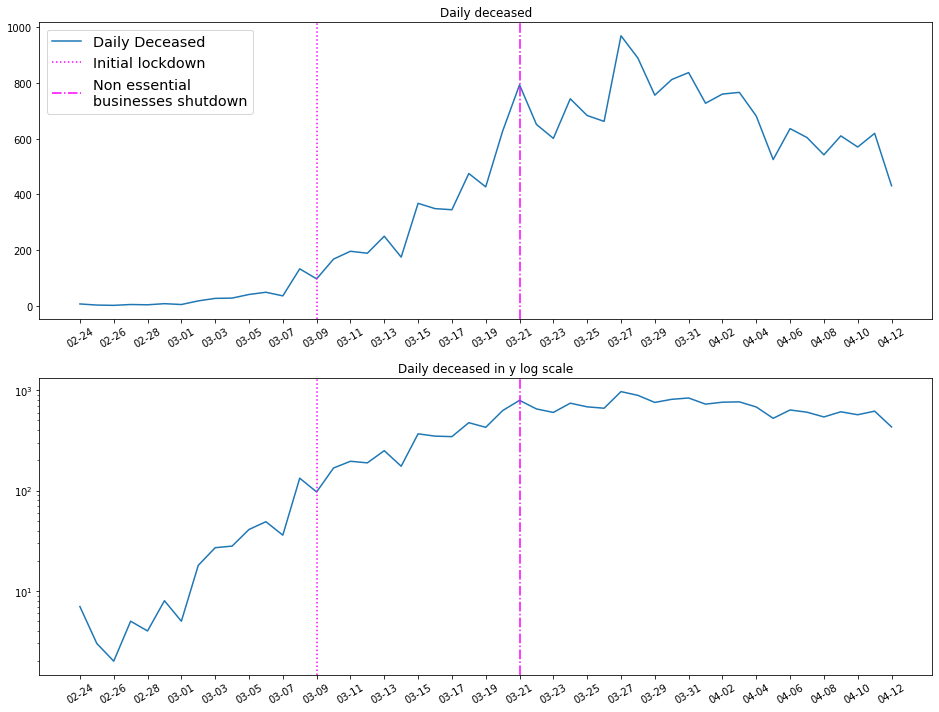

In [5]:
deceduti_giornalieri = [content_dict['deceduti'][0]]

for i in range(1,len(content)-1):
    deceduti_giornalieri.append(content_dict['deceduti'][i]-content_dict['deceduti'][i-1])

plt.figure(figsize = (16,12))
plt.subplot(211)
plt.title('Daily deceased')
plt.plot(content_dict['data'],deceduti_giornalieri,label = 'Daily Deceased')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(loc = 'upper left',fontsize = 'x-large')
plt.subplot(212)
plt.title('Daily deceased in y log scale')
plt.semilogy(content_dict['data'],deceduti_giornalieri,label = 'Daily Deceased')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.show()

## Visualization with Moving averages
[This](https://www.ft.com/coronavirus-latest) article from the Financial Times reports a different curve for the deceased. This is due to the fact that they use a rolling average over 7 days. In my humble opinion, this is overkill, since the deceased curve does not appear so noisy. Furthermore, it may be affected by edge effects. Let us try a moving average without taking into account edge effects.

First of all, let us define the function for the moving average

In [6]:
def moving_average(x,N=1,mode = 'same'):
    ''' This is a function that makes a moving average of a 1d vector using numpy.convolve
    INPUTS: 
    x: one-dimensional vector
    N: dimension of the moving average
    mode: the mode of numpy.convolve, that determines the behaviour at the edges of the moving average. Valid values are full, same and valid. Check the doc for numpy.convolve for details.
    OUTPUT:
    out: the result of the averaging operation'''
    
    import numpy as np

    averaging_window = ([1]*N)
    averaging_window = [i/N for i in averaging_window]

    return np.convolve(x,averaging_window,mode)

Now let's see what happens. First of all, let's try with the "full" method, which slides the moving average kernel over the whole vector. At the edges, there will be regions in which the moving average window will go over the length of the vector, creating edge effects. 
The keyword in the legend refer to the method used by the function `numpy.convolve` to calculate the rolling average
For a full comparison, we will use N = 7.



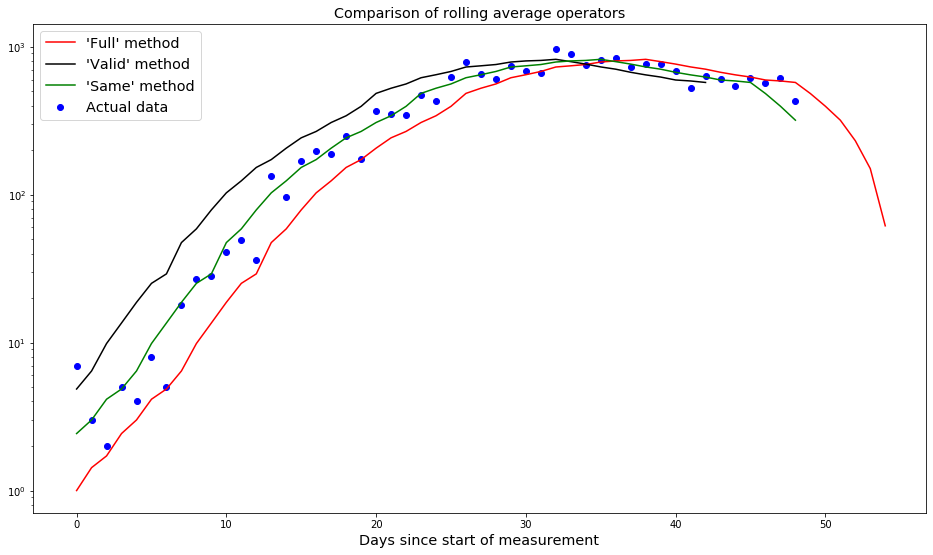

In [7]:
deceased_average_full = moving_average(deceduti_giornalieri,7,mode = 'full')
deceased_average_same = moving_average(deceduti_giornalieri,7,mode = 'same')
deceased_average_valid = moving_average(deceduti_giornalieri,7,mode = 'valid')


plt.figure(figsize = (16,9))
plt.title('Comparison of rolling average operators',fontsize = 'x-large')
plt.semilogy(np.arange(0,len(deceased_average_full)),deceased_average_full, color = 'red')
plt.semilogy(np.arange(0,len(deceased_average_valid)),deceased_average_valid, color = 'black')
plt.semilogy(np.arange(0,len(deceased_average_same)),deceased_average_same, color = 'green')
plt.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue')
plt.legend(["'Full' method","'Valid' method","'Same' method",'Actual data'],fontsize = 'x-large')
plt.xlabel('Days since start of measurement',fontsize = 'x-large')
plt.show()

#### The Devil is in the details!  
The "same" method actually produces the closest result. In this metod, the window of averaging is sliding on the data, with the idea of returning a vector which has the same amount of data as the starting one. Therefore, at the edges, some zeros are placed so that the last point can also receive an averaged value. However, we notice that this produces a distinct reduction in the last three points, which can give us the impression of a reduction which is not reflected by the data.  
The visualization can be useful, but it is _very dangerous_!  A truncation before the last data point might be necessary, which is what we will do in the future.
Reducing the size of the kernel actually produces a better average with a reduced edge effect. We will use that in the future, by truncating the last one or two points, which generate bad effects, as follows

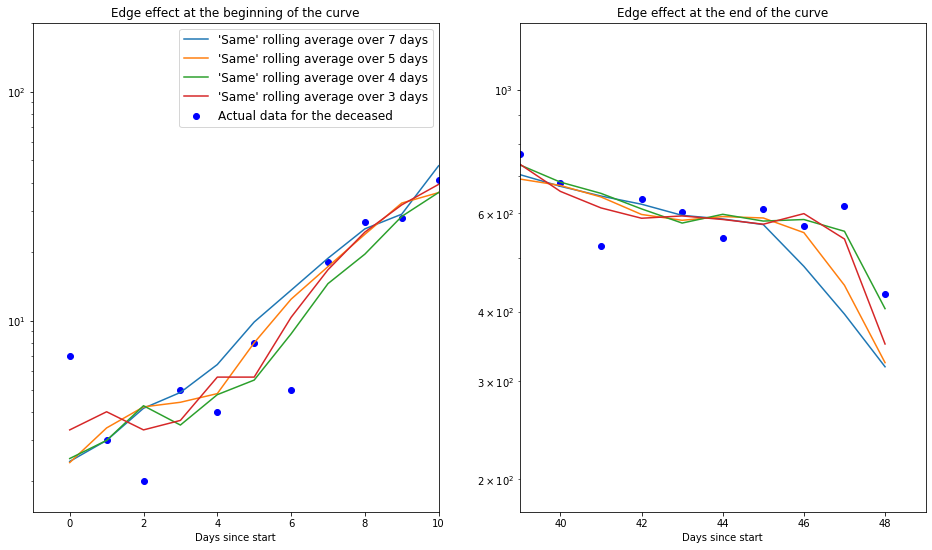

In [8]:
deceased_sameaverage = np.zeros(shape = (8,len(content_dict['deceduti'])));
which_kernels = [7,5,4,3]

for i in which_kernels:
    deceased_sameaverage[i,:] = moving_average(deceduti_giornalieri,i,mode = 'same')

plt.figure(figsize = (16,9))
plt.subplot(121)
plt.title('Edge effect at the beginning of the curve')
ax = plt.gca()
ax.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue',label = 'Actual data for the deceased')
for i in which_kernels:
    plt.semilogy(np.arange(0,len(content_dict['data'])),deceased_sameaverage[i,:],label = ("'Same' rolling average over " + str(i) + " days"))
ax.set_yscale('log')
plt.xlim((-1,10))
plt.ylim((-1,200))
plt.xlabel('Days since start')
plt.legend(loc = 'best',fontsize = 'large')
plt.subplot(122)
plt.title('Edge effect at the end of the curve')
ax = plt.gca()
ax.scatter(np.arange(0,len(content_dict['data'])), deceduti_giornalieri, color = 'blue')
for i in which_kernels:
    plt.semilogy(np.arange(0,len(content_dict['data'])),deceased_sameaverage[i,:])
plt.xlim(len(content_dict['data'])-10,len(content_dict['data']))
plt.ylim(bottom = deceduti_giornalieri[-30])
plt.xlabel('Days since start')

plt.show()



I will assume then that the best way to present these data is to use a 7 days rolling average, mode for `numpy.convolve` set to 'same', truncating before the last three points. Thus:


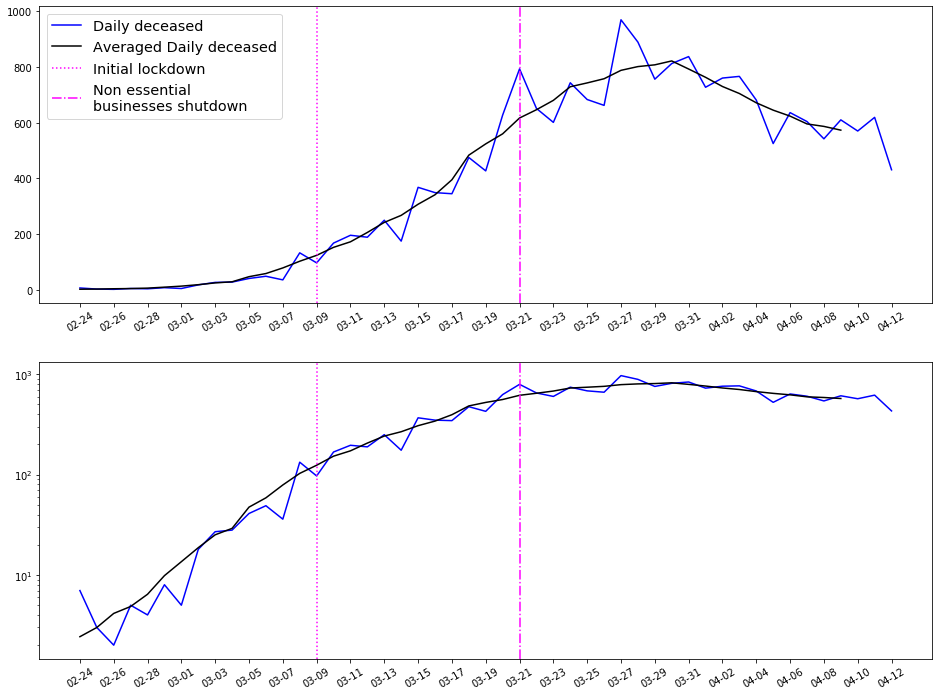

In [9]:
plt.figure(figsize = (16,12))
plt.subplot(211)
plt.plot(content_dict['data'],deceduti_giornalieri,color = 'blue',label = 'Daily deceased')
plt.plot(content_dict['data'][0:-3],deceased_sameaverage[7,0:-3],color = 'black',label = 'Averaged Daily deceased')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.legend(loc = 'upper left',fontsize = 'x-large')
plt.subplot(212)
plt.semilogy(content_dict['data'],deceduti_giornalieri,color = 'blue')
plt.semilogy(content_dict['data'][0:-3],deceased_sameaverage[7,0:-3],color = 'black')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

### Let's do the same with other variations

Kernel = 7 days  
truncation = 3 days

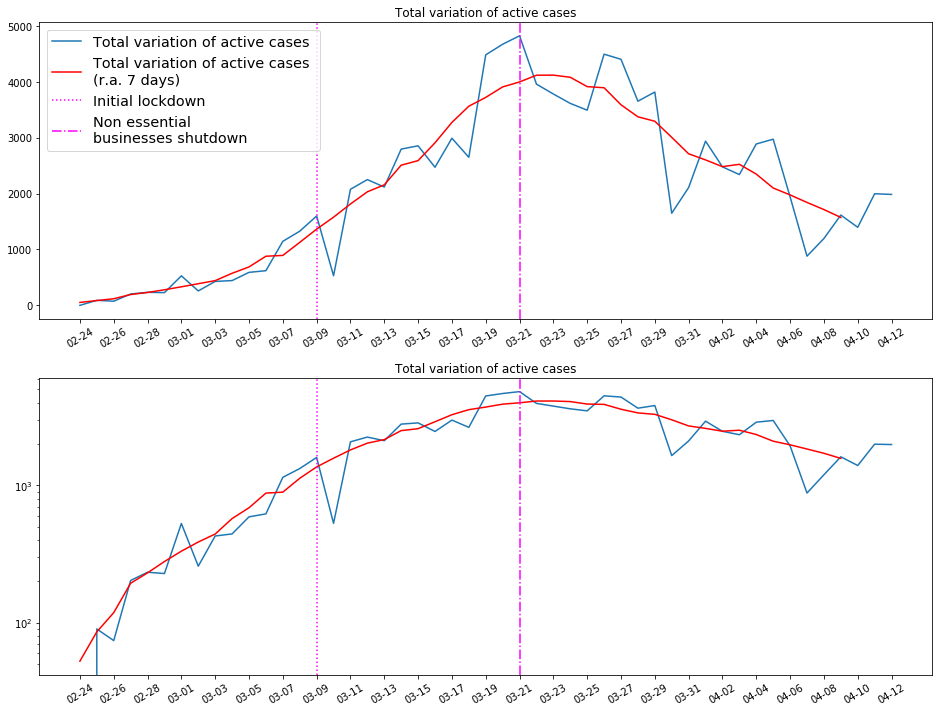

In [10]:
averaged_total_variation_active = moving_average(content_dict['variazione_totale_positivi'],7,mode='same')

plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('Total variation of active cases')
plt.plot(content_dict['data'],content_dict['variazione_totale_positivi'],label = 'Total variation of active cases')
plt.plot(content_dict['data'][0:-3],averaged_total_variation_active[0:-3],label = 'Total variation of active cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large', loc = 'upper left')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.subplot(212)
plt.title('Total variation of active cases')
plt.semilogy(content_dict['data'],content_dict['variazione_totale_positivi'],label = 'Total variation of active cases')
plt.semilogy(content_dict['data'][0:-3],averaged_total_variation_active[0:-3],label = 'Total variation of active cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

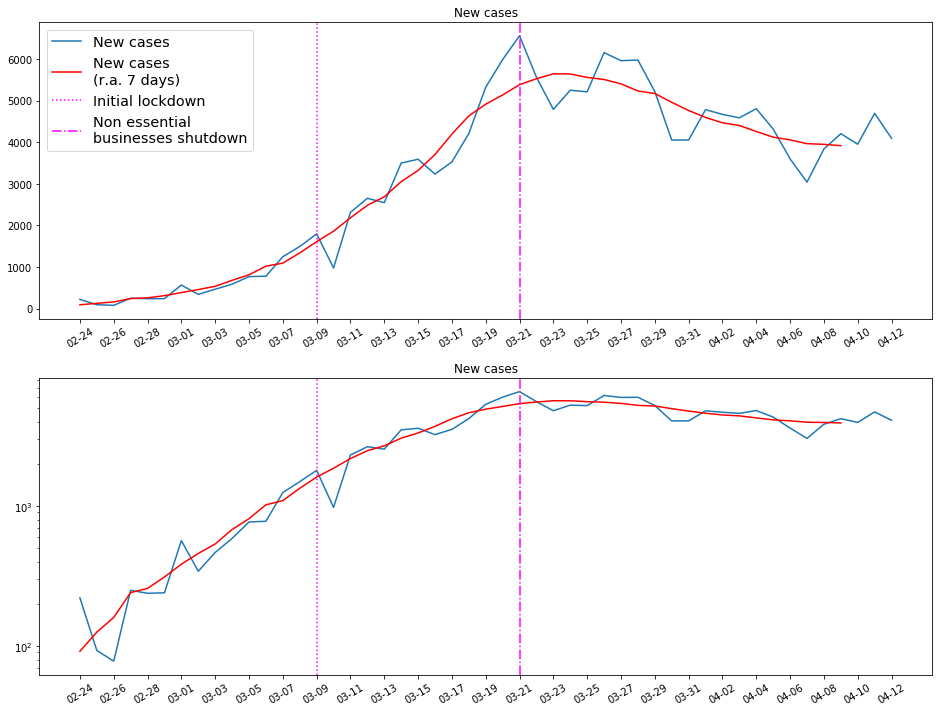

In [11]:
averaged_new_cases = moving_average(content_dict['nuovi_positivi'],7,mode = 'same')

plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('New cases')
plt.plot(content_dict['data'],content_dict['nuovi_positivi'],label = 'New cases')
plt.plot(content_dict['data'][0:-3],averaged_new_cases[0:-3],label = 'New cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large', loc = 'upper left')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.subplot(212)
plt.title('New cases')
plt.semilogy(content_dict['data'],content_dict['nuovi_positivi'],label = 'Total variation of active cases')
plt.semilogy(content_dict['data'][0:-3],averaged_new_cases[0:-3],label = 'New cases \n(r.a. 7 days)',color = 'red')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

#### The road ahead is still quite long. I will try and put some predictions in the future

## Tests

### Here we report the cumulative and daily tests analyzed



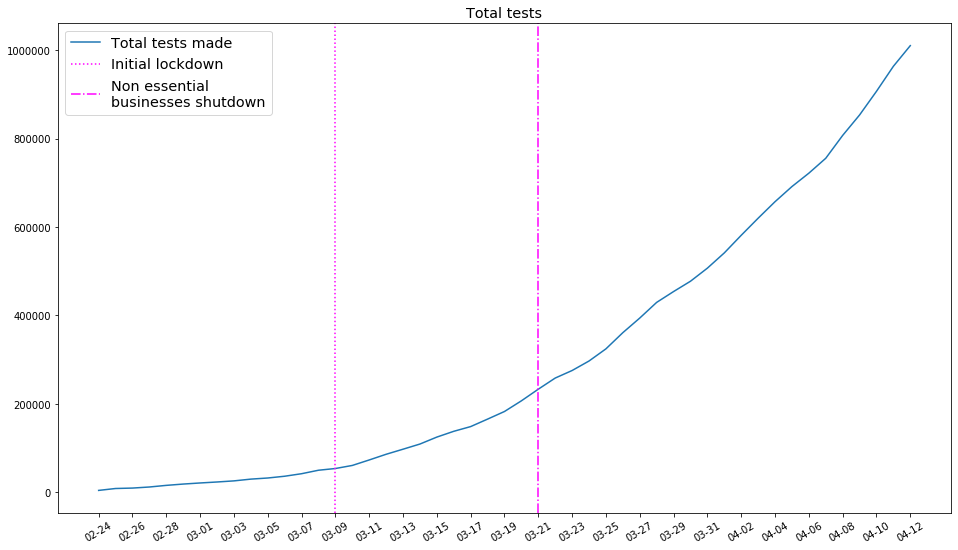

In [12]:
plt.figure(figsize=(16, 9))
plt.title('Total tests',fontsize = 'x-large')
plt.plot(content_dict['data'],content_dict['tamponi'], label = 'Total tests made')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

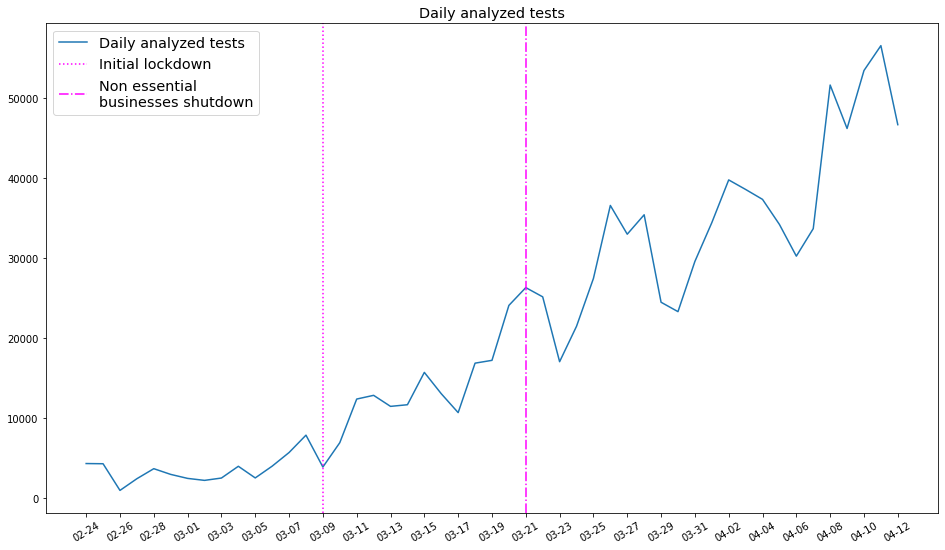

In [13]:
tamponi_gionalieri = [content_dict['tamponi'][0]];
for i in range(1,len(content)-1):
    tamponi_gionalieri.append(content_dict['tamponi'][i]-content_dict['tamponi'][i-1])

plt.figure(figsize=(16, 9))
plt.title('Daily analyzed tests', fontsize = 'x-large')
plt.plot(content_dict['data'],tamponi_gionalieri, label = 'Daily analyzed tests')
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()

### Let's print that again, but highlight the Mondays

This is the list of the Mondays since the start of the reports
 ['02-24', '03-02', '03-09', '03-16', '03-23', '03-30', '04-06']


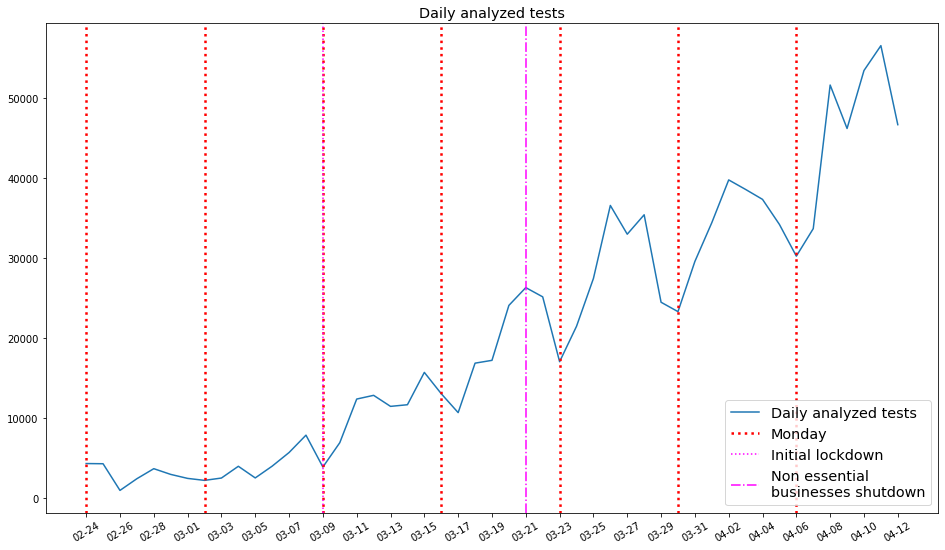

In [14]:
mondays = content_dict['data'][0::7]

print('This is the list of the Mondays since the start of the reports\n {}'.format(mondays))

plt.figure(figsize=(16, 9))
plt.title('Daily analyzed tests', fontsize = 'x-large')
plt.plot(content_dict['data'],tamponi_gionalieri, label = 'Daily analyzed tests')
for i in range(0,len(mondays)):
    if i == 0:
        plt.axvline(x = mondays[i],color = 'red',label = 'Monday',linestyle = ':',linewidth = 2.5)
    else:
        plt.axvline(x = mondays[i],color = 'red',linestyle = ':',linewidth = 2.5)
plt.axvline(x = '03-09', label = 'Initial lockdown',color = 'magenta', linestyle = ':')
plt.axvline(x = '03-21', label = 'Non essential \nbusinesses shutdown',color = 'magenta', linestyle = '-.')
plt.legend(fontsize = 'x-large')
plt.xticks(content_dict['data'][::2],content_dict['data'][::2], rotation = 30)
plt.show()


As it can be actually predicted, during the weekends not a lot of new tests are realized and analyzed. This of course has an influence on the data recorded. This is the reason why a rolling average is a good choice, and why analyzing the correlation below are viable options.

## MY ANALYSIS
### Approach #1

The infected people found every day are not necessarily the total, but only the ones that we know of. However, we can make the reasonable assumption that the number of newly infected people we find is correlated to the total number of infected people. In other words, the test has a success rate, which is highest the more people are infected every day. This success rate is bound to go down when the number of daily new infected people starts to go down.

This means that when the two quantities (new infected vs. daily tests) starts to anticorrelate, we will know we are out of the woods.

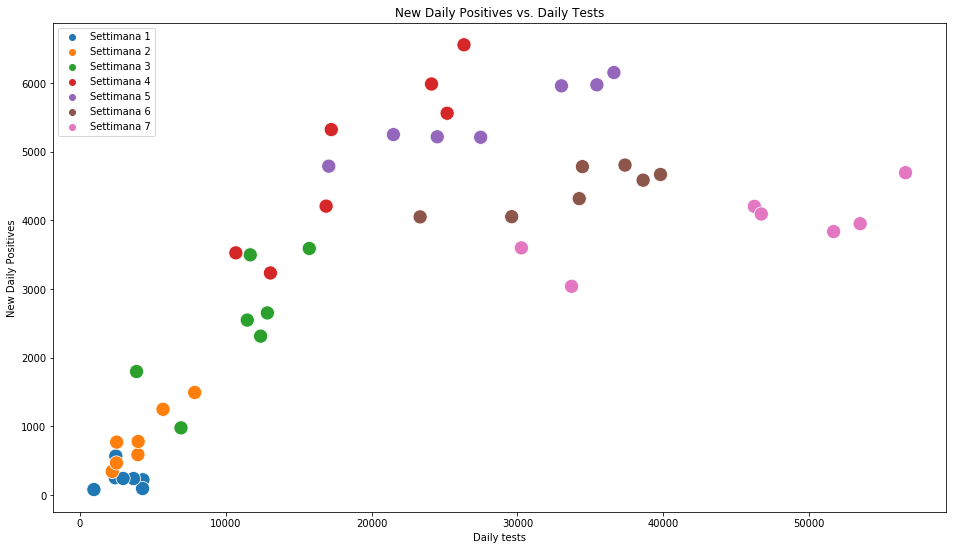

In [15]:
#let's divide the data in weeks to make it easier to visualize
content_dict['settimana'] = [];
content_dict['settimana'].append('Settimana 1')
for i in range(1,len(content_dict['data'])):
    content_dict['settimana'].append('Settimana ' + str(m.ceil((i+1)/7)))

plt.figure(figsize=(16,9))
plt.title('New Daily Positives vs. Daily Tests')
g = sns.scatterplot(x = tamponi_gionalieri, y = content_dict['nuovi_positivi'],hue= content_dict['settimana'],s=200,legend = 'full')
g.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel('Daily tests')
plt.ylabel('New Daily Positives')
plt.show()


We now calculate the Pearson correlation coefficients R per each week.  
The choice of dividing the data per week is somewhat arbitrary, but it gives us a clearer idea of the evolution of the situation, and it is a good block of time.  
The latest week is excluded from the calculation until it has 7 days.



In [20]:
weekly_positives = list(zip(content_dict['settimana'],content_dict['nuovi_positivi']))
positives_this_week = [];
tests_this_week = [];
crosscoeff = [];
complete_weeks = m.ceil(len(content_dict['data'])/7)

for week in range(1,complete_weeks+1):
    positives_this_week = [];
    tests_this_week = [];
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    coeff_matrix = (np.corrcoef(positives_this_week,tests_this_week))
    crosscoeff.append(coeff_matrix[1][0]) 

print('Pearson Correlation Coefficients (daily tests vs. new cases detected) for each week')
print('-----------------------------------------------------------------------------------')
for week in range(1,complete_weeks+1):
    print(f'Week {week}\t\t {crosscoeff[week-1]:.4f}')

Pearson Correlation Coefficients (daily tests vs. new cases detected) for each week
-----------------------------------------------------------------------------------
Week 1		 -0.0584
Week 2		 0.9308
Week 3		 0.7775
Week 4		 0.9284
Week 5		 0.9607
Week 6		 0.8186
Week 7		 0.7772


#### Ok, but can we visualize that somehow?

It is a bit pedestrian, but we can perhaps insert weekly trendlines to understand it better

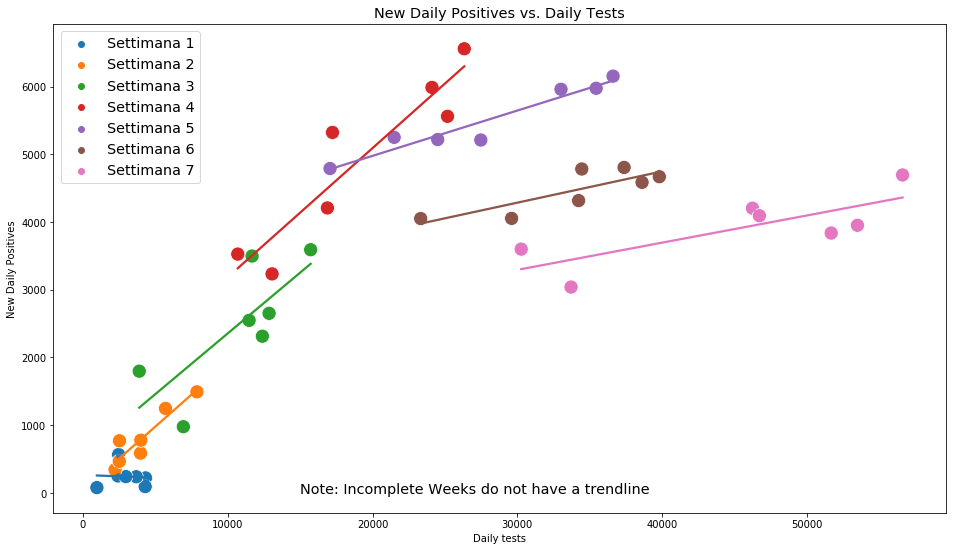

In [23]:
slopes = [];

plt.figure(figsize=(16,9))
plt.title('New Daily Positives vs. Daily Tests',fontsize = 'x-large')
sns.scatterplot(x = tamponi_gionalieri, y = content_dict['nuovi_positivi'],hue= content_dict['settimana'],s=200,legend = 'full')
for week in range(1,complete_weeks+1):
    positives_this_week = [];
    tests_this_week = [];
    for day in range(0,len(content_dict['data'])):
        if weekly_positives[day][0] == 'Settimana '+str(week):
            positives_this_week.append(weekly_positives[day][1])
            tests_this_week.append(tamponi_gionalieri[day])
    ax = sns.regplot(x=tests_this_week,y = positives_this_week,truncate = True, ci = None)
    slope_this_week,_ = np.polyfit(tests_this_week,positives_this_week, deg = 1)
    slopes.append(slope_this_week)
plt.xlabel('Daily tests')
plt.ylabel('New Daily Positives')
plt.legend(loc = 'upper left',fontsize = 'x-large')
plt.text(15000,0,'Note: Incomplete Weeks do not have a trendline',fontsize = 'x-large')
plt.show()

In [31]:
print('Slopes of Daily tests vs. new cases detected for each week')
print('-----------------------------------------------------------------------------------')
for week in range(0,complete_weeks):
    print(f'Week {week+1}\t\t {slopes[week]:.3f}')

Slopes of Daily tests vs. new cases detected for each week
-----------------------------------------------------------------------------------
Week 1		 -0.008
Week 2		 0.189
Week 3		 0.179
Week 4		 0.191
Week 5		 0.067
Week 6		 0.046
Week 7		 0.040


**How to interpret this results?**

We see that apart from the first week, the slope of the trendline is going down. In this case, since we have very few points, the Pearson correlation coefficient is not doing a very good job, and this is actually more descriptive. My opinion: when the trendline start going down, or the Pearson Coefficient start going negative (i.e., the two quantities anticorrelate), it means that we are witnessing a true redution in the number of newly infected people. If we start testing less, and we detect fewer new cases, it doesn't mean much.